In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [2]:
df_sandbox_calls = pd.read_csv('Sandbox_Calls.csv',index_col=0)

In [4]:
df_sandbox_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13674558 entries, 0 to 1536183
Data columns (total 3 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   apiproxy                         object
 1   is_error                         int64 
 2   client_received_start_timestamp  object
dtypes: int64(1), object(2)
memory usage: 417.3+ MB


In [5]:
df_sandbox_calls.head(2)

,apiproxy,is_error,client_received_start_timestamp
0,S4HANACloudAPIs,1,2020-06-11 23:59:59.144
1,S4HANACloudAPIs,1,2020-06-14 23:59:57.513


In [6]:
df_sandbox_calls['Date'] = pd.to_datetime(df_sandbox_calls['client_received_start_timestamp'])

In [7]:
df_sandbox_calls = df_sandbox_calls[['apiproxy','Date']]
df_sandbox_calls['No_of_Calls'] = 1

In [8]:
df_sandbox_calls.head(2)

,apiproxy,Date,No_of_Calls
0,S4HANACloudAPIs,2020-06-11 23:59:59.144,1
1,S4HANACloudAPIs,2020-06-14 23:59:57.513,1


In [9]:
df_sandbox = df_sandbox_calls[['apiproxy','Date']]
df_sandbox.head(2)

,apiproxy,Date
0,S4HANACloudAPIs,2020-06-11 23:59:59.144
1,S4HANACloudAPIs,2020-06-14 23:59:57.513


In [10]:
df_sandbox.apiproxy.value_counts()

SuccessFactors                        9378086
S4HANACloudAPIs                       2882619
CloudPlatformIntegration               590624
SAPAribaOpenAPIs                       265405
SAPCleaProductImageClassification      103498
                                       ...   
FinancialCloudAPI                           1
SAPCPMasterDataforBusinessPartners          1
saptest                                     1
SAPByD                                      1
SAPCleaResumeMatcher                        1
Name: apiproxy, Length: 170, dtype: int64

In [11]:
!pip install sidetable

In [12]:
import sidetable
# sidetable is mix of crosstab, groupby and value_counts
# sidetable can also be used for groupby totals, counts, subtotal, missing values, flattening table
# check the article https://github.com/chris1610/sidetable
df_sandbox.stb.freq(['apiproxy'],style = True, thresh = 99, other_label='Rest of Proxies')

C:\Users\I069554\Anaconda3\lib\site-packages\sidetable\sidetable.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results[results[other_label] == False].append(


,apiproxy,count,percent,cumulative_count,cumulative_percent
0,SuccessFactors,"9,378,086",68.58%,"9,378,086",68.58%
1,S4HANACloudAPIs,"2,882,619",21.08%,"12,260,705",89.66%
2,CloudPlatformIntegration,"590,624",4.32%,"12,851,329",93.98%
3,SAPAribaOpenAPIs,"265,405",1.94%,"13,116,734",95.92%
4,SAPCleaProductImageClassification,"103,498",0.76%,"13,220,232",96.68%
5,SAPCloudforCustomer,"89,537",0.65%,"13,309,769",97.33%
6,DataqualityMicroservices,"51,494",0.38%,"13,361,263",97.71%
7,SAPCPServicesProductConfiguration,"38,015",0.28%,"13,399,278",97.99%
8,SAPOmniChannelBanking,"25,879",0.19%,"13,425,157",98.18%
9,APIPortal,"25,475",0.19%,"13,450,632",98.36%


In [13]:
df_sandbox.head()

,apiproxy,Date
0,S4HANACloudAPIs,2020-06-11 23:59:59.144
1,S4HANACloudAPIs,2020-06-14 23:59:57.513
2,CloudPlatformIntegration,2020-06-20 23:59:51.960
3,SAPAribaOpenAPIs,2020-06-23 23:59:57.327
4,TranslationHub,2020-06-01 00:00:10.738


In [16]:
df_sandbox["No_Of_Calls"] = 1

In [17]:
#Pivot table using Grouper function
df_analysis_grouper = df_sandbox.pivot_table(index=pd.Grouper(key='Date', freq='M'),values=['apiproxy','No_Of_Calls'],aggfunc = np.sum)
df_analysis_grouper.head()

,No_Of_Calls
Date,
2020-06-30,217940
2020-07-31,309127
2020-08-31,560247
2020-09-30,654570
2020-10-31,579713


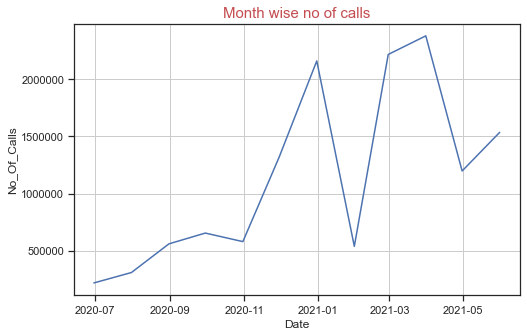

In [18]:
plt.figure(figsize=(8,5))
sns.set(style="ticks")
ax1 = sns.lineplot(x='Date',y='No_Of_Calls',data=df_analysis_grouper)
# To avoid y axis values to convert in exponential format
ax1.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title(label = 'Month wise no of calls',fontdict = {"fontsize":"15","color":"r"})
plt.grid()
plt.show()

In [19]:
df_sandbox.head(2)

,apiproxy,Date,No_Of_Calls
0,S4HANACloudAPIs,2020-06-11 23:59:59.144,1
1,S4HANACloudAPIs,2020-06-14 23:59:57.513,1


In [20]:
#groupby using Grouper function
df_analysis_groupby = df_sandbox.groupby(['apiproxy',pd.Grouper(key = 'Date', freq='M')])["No_Of_Calls"].sum()
df_analysis_groupby.head()

apiproxy   Date      
APIPortal  2020-06-30    1716
           2020-07-31    1418
           2020-08-31    3198
           2020-09-30    3676
           2020-10-31    2846
Name: No_Of_Calls, dtype: int64

In [21]:
df_analysis_groupby=df_analysis_groupby.reset_index()
df_analysis_groupby.head()

,apiproxy,Date,No_Of_Calls
0,APIPortal,2020-06-30,1716
1,APIPortal,2020-07-31,1418
2,APIPortal,2020-08-31,3198
3,APIPortal,2020-09-30,3676
4,APIPortal,2020-10-31,2846


In [22]:
df_analysis_groupby = df_analysis_groupby.sort_values(by=['apiproxy','Date'],ascending=[True,False]).groupby(by='apiproxy').head(2)
df_analysis_groupby.head()

,apiproxy,Date,No_Of_Calls
11,APIPortal,2021-05-31,1899
10,APIPortal,2021-04-30,2069
14,AlgorandBlockchainIntegration,2021-05-31,26
13,AlgorandBlockchainIntegration,2021-04-30,13
16,ApplicationAutoscaler,2021-05-31,6


In [23]:
#Filtering only april/may 2021 records
df_analysis_groupby = df_analysis_groupby.query("Date == '2021-05-31' or Date == '2021-04-30'")
df_analysis_groupby.head()

,apiproxy,Date,No_Of_Calls
11,APIPortal,2021-05-31,1899
10,APIPortal,2021-04-30,2069
14,AlgorandBlockchainIntegration,2021-05-31,26
13,AlgorandBlockchainIntegration,2021-04-30,13
16,ApplicationAutoscaler,2021-05-31,6


In [24]:
#Percentage change in last 2 months
df_pct_change = df_analysis_groupby
df_pct_change['Pct_Change'] = df_pct_change.sort_values(by=['apiproxy','Date']).groupby(by = ['apiproxy'],sort=False)['No_Of_Calls'].apply(pd.Series.pct_change)
df_pct_change.head(10)

,apiproxy,Date,No_Of_Calls,Pct_Change
11,APIPortal,2021-05-31,1899,-0.082165
10,APIPortal,2021-04-30,2069,NaN
14,AlgorandBlockchainIntegration,2021-05-31,26,1.000000
13,AlgorandBlockchainIntegration,2021-04-30,13,NaN
16,ApplicationAutoscaler,2021-05-31,6,-0.846154
15,ApplicationAutoscaler,2021-04-30,39,NaN
23,B1RaiseFaultProxy,2021-05-31,1,NaN
35,CloudPlatformIntegration,2021-05-31,36920,0.346070
34,CloudPlatformIntegration,2021-04-30,27428,NaN
55,Cryptowerk,2021-05-31,1,0.000000


In [25]:
df_prev_month = df_pct_change.query("No_Of_Calls>100 and Date=='2021-04-30'")
df_prev_month

,apiproxy,Date,No_Of_Calls,Pct_Change
10,APIPortal,2021-04-30,2069,NaN
34,CloudPlatformIntegration,2021-04-30,27428,NaN
105,DevPortalAPI,2021-04-30,482,NaN
413,S4B_Banking,2021-04-30,632,NaN
425,S4HANACloudAPIs,2021-04-30,216143,NaN
477,SAPAPIManagement_CF_APIPortal,2021-04-30,925,NaN
483,SAPAPIManagement_CF_DevPortal,2021-04-30,508,NaN
498,SAPAribaOpenAPIs,2021-04-30,18481,NaN
510,SAPAssetIntelligentNetwork,2021-04-30,507,NaN
522,SAPBusinessOneCloud,2021-04-30,1221,NaN


In [26]:
df_curr_month = df_pct_change.query("No_Of_Calls>100 and Date=='2021-05-31' and Pct_Change>0")
df_curr_month

,apiproxy,Date,No_Of_Calls,Pct_Change
35,CloudPlatformIntegration,2021-05-31,36920,0.346070
106,DevPortalAPI,2021-05-31,509,0.056017
138,EPD_VISUALIZATION_STORAGE,2021-05-31,8296,179.347826
426,S4HANACloudAPIs,2021-05-31,300448,0.390043
478,SAPAPIManagement_CF_APIPortal,2021-05-31,985,0.064865
480,SAPAPIManagement_CF_APIPortal_Analytics,2021-05-31,180,8.000000
484,SAPAPIManagement_CF_DevPortal,2021-05-31,964,0.897638
499,SAPAribaOpenAPIs,2021-05-31,20279,0.097289
511,SAPAssetIntelligentNetwork,2021-05-31,9450,17.639053
588,SAPCPServicesPricing,2021-05-31,436,1.369565


In [27]:
df_consolidated_col = df_curr_month.merge(df_prev_month,how='inner',on='apiproxy')
df_consolidated_col.sort_values(by='Pct_Change_x',ascending=False)

,apiproxy,Date_x,No_Of_Calls_x,Pct_Change_x,Date_y,No_Of_Calls_y,Pct_Change_y
6,SAPAssetIntelligentNetwork,2021-05-31,9450,17.639053,2021-04-30,507,NaN
10,SAPCloudforCustomer,2021-05-31,28506,2.455273,2021-04-30,8250,NaN
7,SAPCPServicesPricing,2021-05-31,436,1.369565,2021-04-30,184,NaN
4,SAPAPIManagement_CF_DevPortal,2021-05-31,964,0.897638,2021-04-30,508,NaN
2,S4HANACloudAPIs,2021-05-31,300448,0.390043,2021-04-30,216143,NaN
13,SAPJam,2021-05-31,1460,0.376060,2021-04-30,1061,NaN
0,CloudPlatformIntegration,2021-05-31,36920,0.346070,2021-04-30,27428,NaN
20,SuccessFactors,2021-05-31,1098811,0.236496,2021-04-30,888649,NaN
16,SAPSubscriptionBilling,2021-05-31,266,0.214612,2021-04-30,219,NaN
8,SAPChangeAndTransportSystem,2021-05-31,171,0.132450,2021-04-30,151,NaN


In [28]:
df_consolidated_row = pd.concat([df_curr_month,df_prev_month],keys='apiproxy',join='inner')
df_consolidated_row.sort_values(by='apiproxy')

apiproxy       Date  \
p 10                                            APIPortal 2021-04-30   
a 35                             CloudPlatformIntegration 2021-05-31   
p 34                             CloudPlatformIntegration 2021-04-30   
  105                                        DevPortalAPI 2021-04-30   
a 106                                        DevPortalAPI 2021-05-31   
  138                           EPD_VISUALIZATION_STORAGE 2021-05-31   
p 413                                         S4B_Banking 2021-04-30   
  425                                     S4HANACloudAPIs 2021-04-30   
a 426                                     S4HANACloudAPIs 2021-05-31   
p 477                       SAPAPIManagement_CF_APIPortal 2021-04-30   
a 478                       SAPAPIManagement_CF_APIPortal 2021-05-31   
  480             SAPAPIManagement_CF_APIPortal_Analytics 2021-05-31   
p 483                       SAPAPIManagement_CF_DevPortal 2021-04-30   
a 484                       SAPAPIManagement_CF_DevPortal 2021-05-31   
p 498                                    SAPAribaOpenAPIs 2021-04-30   
a 499                                    SAPAribaOpenAPIs 2021-05-31   
p 510                          SAPAssetIntelligentNetwork 2021-04-30   
a 511                          SAPAssetIntelligentNetwork 2021-05-31   
p 522                                 SAPBusinessOneCloud 2021-04-30   
  587                                SAPCPServicesPricing 2021-04-30   
a 588                                SAPCPServicesPricing 2021-05-31   
p 599                   SAPCPServicesProductConfiguration 2021-04-30   
  611                         SAPChangeAndTransportSystem 2021-04-30   
a 612                         SAPChangeAndTransportSystem 2021-05-31   
p 657                   SAPCleaProductImageClassification 2021-04-30   
a 658                   SAPCleaProductImageClassification 2021-05-31   
  711                                 SAPCloudforCustomer 2021-05-31   
p 710                                 SAPCloudforCustomer 2021-04-30   
a 744                      SAPDVHVehicleObjectAssociation 2021-05-31   
p 743                      SAPDVHVehicleObjectAssociation 2021-04-30   
a 796                                       SAPFieldglass 2021-05-31   
p 795                                       SAPFieldglass 2021-04-30   
  817                              SAPHANASpatialServices 2021-04-30   
  840                       SAPIntegratedBusinessPlanning 2021-04-30   
a 854                                              SAPJam 2021-05-31   
p 853                                              SAPJam 2021-04-30   
  992                               SAPOmniChannelBanking 2021-04-30   
a 1005          SAPOmnichannelPromotionPricingCalculation 2021-05-31   
  1017           SAPOmnichannelPromotionPricingDataaccess 2021-05-31   
p 1016           SAPOmnichannelPromotionPricingDataaccess 2021-04-30   
a 1044                     SAPReturnablePackageManagement 2021-05-31   
p 1043                     SAPReturnablePackageManagement 2021-04-30   
a 1056                             SAPSubscriptionBilling 2021-05-31   
p 1055                             SAPSubscriptionBilling 2021-04-30   
  1067                          SAPSupplyBaseOptimization 2021-04-30   
a 1068                          SAPSupplyBaseOptimization 2021-05-31   
p 1079                                 SAPWorkflowService 2021-04-30   
a 1080                                 SAPWorkflowService 2021-05-31   
  1118  SCPAuthorizationTrustManagementService-Platfor... 2021-05-31   
p 1117  SCPAuthorizationTrustManagementService-Platfor... 2021-04-30   
  1175                                     SuccessFactors 2021-04-30   
a 1176                                     SuccessFactors 2021-05-31   
p 1197                                     TranslationHub 2021-04-30   

        No_Of_Calls  Pct_Change  
p 10           2069         NaN  
a 35          36920    0.346070  
p 34          27428         NaN  
  105           482     

In [29]:
# we can also use grouper function on date column (no need to index the Date as we do in resample function)
df_sandbox_calls["No_Of_Calls"] = 1
df_sandbox_calls_monthly = df_sandbox_calls.groupby(['apiproxy',pd.Grouper(key = 'Date', freq='M', origin='2021-01-01')])["No_Of_Calls"].sum().reset_index()

In [30]:
df_sandbox_calls_monthly_S4HANACloudAPIs = df_sandbox_calls_monthly.query("apiproxy == 'S4HANACloudAPIs'")
df_sandbox_calls_monthly_S4HANACloudAPIs

,apiproxy,Date,No_Of_Calls
415,S4HANACloudAPIs,2020-06-30,53238
416,S4HANACloudAPIs,2020-07-31,152572
417,S4HANACloudAPIs,2020-08-31,337037
418,S4HANACloudAPIs,2020-09-30,459346
419,S4HANACloudAPIs,2020-10-31,412623
420,S4HANACloudAPIs,2020-11-30,334332
421,S4HANACloudAPIs,2020-12-31,120943
422,S4HANACloudAPIs,2021-01-31,107917
423,S4HANACloudAPIs,2021-02-28,173362
424,S4HANACloudAPIs,2021-03-31,214658


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [32]:
df_sandbox.stb.freq(['apiproxy'],style = True, thresh = 99, other_label='Rest of Proxies')

C:\Users\I069554\Anaconda3\lib\site-packages\sidetable\sidetable.py:151: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results[results[other_label] == False].append(


,apiproxy,count,percent,cumulative_count,cumulative_percent
0,SuccessFactors,"9,378,086",68.58%,"9,378,086",68.58%
1,S4HANACloudAPIs,"2,882,619",21.08%,"12,260,705",89.66%
2,CloudPlatformIntegration,"590,624",4.32%,"12,851,329",93.98%
3,SAPAribaOpenAPIs,"265,405",1.94%,"13,116,734",95.92%
4,SAPCleaProductImageClassification,"103,498",0.76%,"13,220,232",96.68%
5,SAPCloudforCustomer,"89,537",0.65%,"13,309,769",97.33%
6,DataqualityMicroservices,"51,494",0.38%,"13,361,263",97.71%
7,SAPCPServicesProductConfiguration,"38,015",0.28%,"13,399,278",97.99%
8,SAPOmniChannelBanking,"25,879",0.19%,"13,425,157",98.18%
9,APIPortal,"25,475",0.19%,"13,450,632",98.36%


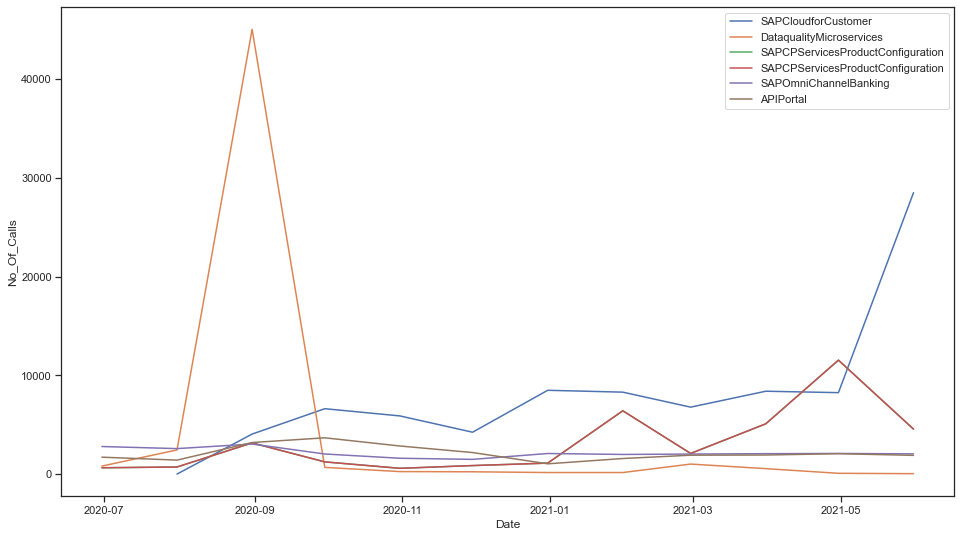

In [33]:
plt.figure(figsize=(16,9))
# sns.lineplot(x='Date', y = 'No_Of_Calls',label='S/4HANA', data=(df_sandbox_calls_monthly.query("apiproxy == 'S4HANACloudAPIs'")))
# sns.lineplot(x='Date', y = 'No_Of_Calls',label = 'SuccessFactors', data=(df_sandbox_calls_monthly.query("apiproxy == 'SuccessFactors'")))
# sns.lineplot(x='Date', y = 'No_Of_Calls',label = 'SAP BTP', data=(df_sandbox_calls_monthly.query("apiproxy == 'CloudPlatformIntegration'")))
# sns.lineplot(x='Date', y = 'No_Of_Calls',label = 'Ariba', data=(df_sandbox_calls_monthly.query("apiproxy == 'SAPAribaOpenAPIs'")))
# sns.lineplot(x='Date', y = 'No_Of_Calls',label = 'SAPCleaProductImageClassification', data=(df_sandbox_calls_monthly.query("apiproxy == 'SAPCleaProductImageClassification'")))
sns.lineplot(x='Date', y = 'No_Of_Calls',label = 'SAPCloudforCustomer', data=(df_sandbox_calls_monthly.query("apiproxy == 'SAPCloudforCustomer'")))
sns.lineplot(x='Date', y = 'No_Of_Calls',label = 'DataqualityMicroservices', data=(df_sandbox_calls_monthly.query("apiproxy == 'DataqualityMicroservices'")))
sns.lineplot(x='Date', y = 'No_Of_Calls',label = 'SAPCPServicesProductConfiguration', data=(df_sandbox_calls_monthly.query("apiproxy == 'SAPCPServicesProductConfiguration'")))
sns.lineplot(x='Date', y = 'No_Of_Calls',label = 'SAPCPServicesProductConfiguration', data=(df_sandbox_calls_monthly.query("apiproxy == 'SAPCPServicesProductConfiguration'")))
sns.lineplot(x='Date', y = 'No_Of_Calls',label = 'SAPOmniChannelBanking', data=(df_sandbox_calls_monthly.query("apiproxy == 'SAPOmniChannelBanking'")))
sns.lineplot(x='Date', y = 'No_Of_Calls',label = 'APIPortal', data=(df_sandbox_calls_monthly.query("apiproxy == 'APIPortal'")))
plt.legend()